<a href="https://colab.research.google.com/github/ZeusKwon/Data-Science/blob/main/n113_data_manipulation_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[warm-up] ÏûêÏ£ºÏÇ¨Ïö©ÌïòÎäî pandas tricks Ï†ïÎ¶¨**

In [39]:
import pandas as pd
import numpy as np

In [40]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
movies = pd.read_csv('http://bit.ly/imdbratings')
orders = pd.read_csv('http://bit.ly/chiporders', sep='\t')
orders['item_price'] = orders.item_price.str.replace('$', '').astype('float')
stocks = pd.read_csv('http://bit.ly/smallstocks', parse_dates=['Date'])
titanic = pd.read_csv('http://bit.ly/kaggletrain')
ufo = pd.read_csv('http://bit.ly/uforeports', parse_dates=['Time'])

In [41]:
url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kt%26g/kt%26g_0.csv'
headers = ['Î∂ÑÍ∏∞', 'Îß§Ï∂úÏï°', 'ÏòÅÏóÖÏù¥Ïùµ', 'ÏòÅÏóÖÏù¥Ïùµ(Î∞úÌëúÍ∏∞Ï§Ä)', 'ÏÑ∏Ï†ÑÍ≥ÑÏÜçÏÇ¨ÏóÖÏù¥Ïùµ',
           'ÎãπÍ∏∞ÏàúÏù¥Ïùµ', 'ÎãπÍ∏∞ÏàúÏù¥Ïùµ(ÏßÄÎ∞∞)', 'ÎãπÍ∏∞ÏàúÏù¥Ïùµ(ÎπÑÏßÄÎ∞∞)', 'ÏûêÏÇ∞Ï¥ùÍ≥Ñ', 'Î∂ÄÏ±ÑÏ¥ùÍ≥Ñ',
           'ÏûêÎ≥∏Ï¥ùÍ≥Ñ', 'ÏûêÎ≥∏Ï¥ùÍ≥Ñ(ÏßÄÎ∞∞)', 'ÏûêÎ≥∏Ï¥ùÍ≥Ñ(ÎπÑÏßÄÎ∞∞)', 'ÏûêÎ≥∏Í∏à', 'ÏòÅÏóÖÌôúÎèôÌòÑÍ∏àÌùêÎ¶Ñ',
           'Ìà¨ÏûêÌôúÎèôÌòÑÍ∏àÌùêÎ¶Ñ', 'Ïû¨Î¨¥ÌôúÎèôÌòÑÍ∏àÌùêÎ¶Ñ', 'ÏòÅÏóÖÏù¥ÏùµÎ•†', 'ÏàúÏù¥ÏùµÎ•†', 'ROE(%)',
           'ROA(%)', 'Î∂ÄÏ±ÑÎπÑÏú®', 'ÏûêÎ≥∏Ïú†Î≥¥Ïú®', 'EPS(Ïõê)', 'PER(Î∞∞)']
import pandas as pd

df_test = pd.read_csv(url, names = headers)

df_test

Î∂ÑÍ∏∞     Îß§Ï∂úÏï°   ÏòÅÏóÖÏù¥Ïùµ ÏòÅÏóÖÏù¥Ïùµ(Î∞úÌëúÍ∏∞Ï§Ä)  ...   Î∂ÄÏ±ÑÎπÑÏú®   ÏûêÎ≥∏Ïú†Î≥¥Ïú® EPS(Ïõê)  PER(Î∞∞)
0   19/6  12,578  3,991      3,991  ...  31.43  803.22  2,351   13.77
1   19/9  13,222  3,825      3,825  ...  24.17  836.86  2,337   13.87
2  19/12  11,982  2,523      2,523  ...  23.04  850.82    873   12.42
3   20/3  11,784  3,150      3,150  ...  29.69  823.16  2,134    9.71
4   20/6  13,188  3,947      3,947  ...  26.91  837.40  2,135   10.46

[5 rows x 25 columns]

### 1. show installed versions



In [42]:
# pandasÏùò Î≤ÑÏ†ÑÏùÑ ÌôïÏù∏
pd.__version__

'1.1.5'

In [43]:
# Î™®Îì† ÏÑ§Ïπò Î≤ÑÏ†ÑÏùÑ ÌôïÏù∏
pd.show_versions()

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)



INSTALLED VERSIONS
------------------
commit           : b5958ee1999e9aead1938c0bba2b674378807b3d
python           : 3.7.10.final.0
python-bits      : 64
OS               : Linux
OS-release       : 4.19.112+
Version          : #1 SMP Thu Jul 23 08:00:38 PDT 2020
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.1.5
numpy            : 1.19.5
pytz             : 2018.9
dateutil         : 2.8.1
pip              : 19.3.1
setuptools       : 56.1.0
Cython           : 0.29.22
pytest           : 3.6.4
hypothesis       : None
sphinx           : 1.8.5
blosc            : None
feather          : 0.4.1
xlsxwriter       : None
lxml.etree       : 4.2.6
html5lib         : 1.0.1
pymysql          : None
psycopg2         : 2.7.6.1 (dt dec pq3 ext lo64)
jinja2           : 2.11.3
IPython          : 5.5.0
pandas_datareader: 0.9.0
bs4              : 4.6.3
bottleneck       : 

### 2. Create an example DataFrame

In [ ]:
# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
df = pd.DataFrame({'col one':[100,200], 'col two':[300,400]})
df

col one  col two
0      100      300
1      200      400

In [ ]:
# 4X8Ïù∏ Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùÑ ÎûúÎç§Ïù∏ ÏàòÎ°ú ÏÉùÏÑ±
pd.DataFrame(np.random.rand(4,8))

0         1         2  ...         5         6         7
0  0.587444  0.434059  0.252389  ...  0.184214  0.051949  0.459646
1  0.379674  0.296575  0.092817  ...  0.620685  0.647754  0.303707
2  0.414809  0.754432  0.020765  ...  0.945617  0.730726  0.764283
3  0.012780  0.168933  0.140260  ...  0.105764  0.031287  0.751827

[4 rows x 8 columns]

In [ ]:
# Ïó¥Ïù¥Î¶ÑÏùÄ aÎ∂ÄÌÑ∞ hÍπåÏßÄÎ°ú ÏßÄÏ†ï Ïó¥ Í∞ØÏàòÏôÄ Í∞ôÏïÑÏïº Ìï®
pd.DataFrame(np.random.rand(4,8),columns=list('abcdefgh'))

a         b         c  ...         f         g         h
0  0.164599  0.111263  0.011151  ...  0.743126  0.965739  0.990292
1  0.074815  0.403781  0.421859  ...  0.266494  0.769492  0.542338
2  0.054073  0.329008  0.625092  ...  0.250234  0.410511  0.265775
3  0.642768  0.997330  0.944906  ...  0.300850  0.546308  0.700607

[4 rows x 8 columns]

### 2. Rename columns(ÏπºÎüº Ïù¥Î¶Ñ Î∞îÍæ∏Í∏∞)

In [44]:
df

col_one   col_two
0       a  [10, 40]
1       b  [20, 50]
2       c  [30, 60]

In [ ]:
# 1Î≤àÏß∏ Î∞©Î≤ï
df1 = df
df1 = df1.rename({'col one':'col_one', 'col two':'col_two'},axis = 'columns')
df1

col_one  col_two
0      100      300
1      200      400

In [ ]:
# 2Î≤àÏß∏ Î∞©Î≤ï
df2 = df
df2.columns = ['col_one', 'col_two']
df2

col_one  col_two
0      100      300
1      200      400

In [ ]:
# 3Î≤àÏß∏ Î∞©Î≤ï
df3 = df
df3.columns = df.columns.str.replace(' ', '_')
df3

col_one  col_two
0      100      300
1      200      400

In [ ]:
# ÏπºÎüº ÏïûÏóê ÌäπÏ†ï Îã®Ïñ¥ Ï∂îÍ∞Ä
df.add_prefix('X_')

X_col_one  X_col_two
0        100        300
1        200        400

In [ ]:
# ÏπºÎüº Îí§Ïóê ÌäπÏ†ï Îã®Ïñ¥ Ï∂îÍ∞Ä
df.add_suffix('_Y')

col_one_Y  col_two_Y
0        100        300
1        200        400

### 4. Reverse row order(row Îí§ÏßëÍ∏∞)

In [ ]:
df_test

Î∂ÑÍ∏∞     Îß§Ï∂úÏï°   ÏòÅÏóÖÏù¥Ïùµ ÏòÅÏóÖÏù¥Ïùµ(Î∞úÌëúÍ∏∞Ï§Ä)  ...   Î∂ÄÏ±ÑÎπÑÏú®   ÏûêÎ≥∏Ïú†Î≥¥Ïú® EPS(Ïõê)  PER(Î∞∞)
0   19/6  12,578  3,991      3,991  ...  31.43  803.22  2,351   13.77
1   19/9  13,222  3,825      3,825  ...  24.17  836.86  2,337   13.87
2  19/12  11,982  2,523      2,523  ...  23.04  850.82    873   12.42
3   20/3  11,784  3,150      3,150  ...  29.69  823.16  2,134    9.71
4   20/6  13,188  3,947      3,947  ...  26.91  837.40  2,135   10.46

[5 rows x 25 columns]

In [ ]:
# 1Î≤àÏß∏ Î∞©Î≤ï
df_test.loc[::-1]

Î∂ÑÍ∏∞     Îß§Ï∂úÏï°   ÏòÅÏóÖÏù¥Ïùµ ÏòÅÏóÖÏù¥Ïùµ(Î∞úÌëúÍ∏∞Ï§Ä)  ...   Î∂ÄÏ±ÑÎπÑÏú®   ÏûêÎ≥∏Ïú†Î≥¥Ïú® EPS(Ïõê)  PER(Î∞∞)
4   20/6  13,188  3,947      3,947  ...  26.91  837.40  2,135   10.46
3   20/3  11,784  3,150      3,150  ...  29.69  823.16  2,134    9.71
2  19/12  11,982  2,523      2,523  ...  23.04  850.82    873   12.42
1   19/9  13,222  3,825      3,825  ...  24.17  836.86  2,337   13.87
0   19/6  12,578  3,991      3,991  ...  31.43  803.22  2,351   13.77

[5 rows x 25 columns]

In [ ]:
# 2Î≤àÏß∏ Î∞©Î≤ï
df_test.loc[::-1].reset_index(drop=True)

Î∂ÑÍ∏∞     Îß§Ï∂úÏï°   ÏòÅÏóÖÏù¥Ïùµ ÏòÅÏóÖÏù¥Ïùµ(Î∞úÌëúÍ∏∞Ï§Ä)  ...   Î∂ÄÏ±ÑÎπÑÏú®   ÏûêÎ≥∏Ïú†Î≥¥Ïú® EPS(Ïõê)  PER(Î∞∞)
0   20/6  13,188  3,947      3,947  ...  26.91  837.40  2,135   10.46
1   20/3  11,784  3,150      3,150  ...  29.69  823.16  2,134    9.71
2  19/12  11,982  2,523      2,523  ...  23.04  850.82    873   12.42
3   19/9  13,222  3,825      3,825  ...  24.17  836.86  2,337   13.87
4   19/6  12,578  3,991      3,991  ...  31.43  803.22  2,351   13.77

[5 rows x 25 columns]

### 5. Reverse column order(Ïó¥ ÏàúÏÑú Î∞îÍæ∏Í∏∞)

In [ ]:
df_test

Î∂ÑÍ∏∞     Îß§Ï∂úÏï°   ÏòÅÏóÖÏù¥Ïùµ ÏòÅÏóÖÏù¥Ïùµ(Î∞úÌëúÍ∏∞Ï§Ä)  ...   Î∂ÄÏ±ÑÎπÑÏú®   ÏûêÎ≥∏Ïú†Î≥¥Ïú® EPS(Ïõê)  PER(Î∞∞)
0   19/6  12,578  3,991      3,991  ...  31.43  803.22  2,351   13.77
1   19/9  13,222  3,825      3,825  ...  24.17  836.86  2,337   13.87
2  19/12  11,982  2,523      2,523  ...  23.04  850.82    873   12.42
3   20/3  11,784  3,150      3,150  ...  29.69  823.16  2,134    9.71
4   20/6  13,188  3,947      3,947  ...  26.91  837.40  2,135   10.46

[5 rows x 25 columns]

In [ ]:
df_test.loc[:,::-1]

PER(Î∞∞) EPS(Ïõê)   ÏûêÎ≥∏Ïú†Î≥¥Ïú®   Î∂ÄÏ±ÑÎπÑÏú®  ...  ÏòÅÏóÖÏù¥Ïùµ(Î∞úÌëúÍ∏∞Ï§Ä)   ÏòÅÏóÖÏù¥Ïùµ     Îß§Ï∂úÏï°     Î∂ÑÍ∏∞
0   13.77  2,351  803.22  31.43  ...       3,991  3,991  12,578   19/6
1   13.87  2,337  836.86  24.17  ...       3,825  3,825  13,222   19/9
2   12.42    873  850.82  23.04  ...       2,523  2,523  11,982  19/12
3    9.71  2,134  823.16  29.69  ...       3,150  3,150  11,784   20/3
4   10.46  2,135  837.40  26.91  ...       3,947  3,947  13,188   20/6

[5 rows x 25 columns]

### 6. Select columns by data type(ÌäπÏ†ï Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Ï∂îÏ∂ú)

In [ ]:
df_test.dtypes

Î∂ÑÍ∏∞             object
Îß§Ï∂úÏï°            object
ÏòÅÏóÖÏù¥Ïùµ           object
ÏòÅÏóÖÏù¥Ïùµ(Î∞úÌëúÍ∏∞Ï§Ä)     object
ÏÑ∏Ï†ÑÍ≥ÑÏÜçÏÇ¨ÏóÖÏù¥Ïùµ       object
ÎãπÍ∏∞ÏàúÏù¥Ïùµ          object
ÎãπÍ∏∞ÏàúÏù¥Ïùµ(ÏßÄÎ∞∞)      object
ÎãπÍ∏∞ÏàúÏù¥Ïùµ(ÎπÑÏßÄÎ∞∞)      int64
ÏûêÏÇ∞Ï¥ùÍ≥Ñ           object
Î∂ÄÏ±ÑÏ¥ùÍ≥Ñ           object
ÏûêÎ≥∏Ï¥ùÍ≥Ñ           object
ÏûêÎ≥∏Ï¥ùÍ≥Ñ(ÏßÄÎ∞∞)       object
ÏûêÎ≥∏Ï¥ùÍ≥Ñ(ÎπÑÏßÄÎ∞∞)     float64
ÏûêÎ≥∏Í∏à            object
ÏòÅÏóÖÌôúÎèôÌòÑÍ∏àÌùêÎ¶Ñ       object
Ìà¨ÏûêÌôúÎèôÌòÑÍ∏àÌùêÎ¶Ñ       object
Ïû¨Î¨¥ÌôúÎèôÌòÑÍ∏àÌùêÎ¶Ñ       object
ÏòÅÏóÖÏù¥ÏùµÎ•†         float64
ÏàúÏù¥ÏùµÎ•†          float64
ROE(%)        float64
ROA(%)        float64
Î∂ÄÏ±ÑÎπÑÏú®          float64
ÏûêÎ≥∏Ïú†Î≥¥Ïú®         float64
EPS(Ïõê)         object
PER(Î∞∞)        float64
dtype: object

In [ ]:
# Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖÏù¥ numberÏù∏ ÏπºÎüºÎßå Ï∂îÏ∂ú
df_test.select_dtypes(include='number') 

ÎãπÍ∏∞ÏàúÏù¥Ïùµ(ÎπÑÏßÄÎ∞∞)  ÏûêÎ≥∏Ï¥ùÍ≥Ñ(ÎπÑÏßÄÎ∞∞)  ÏòÅÏóÖÏù¥ÏùµÎ•†   ÏàúÏù¥ÏùµÎ•†  ROE(%)  ROA(%)   Î∂ÄÏ±ÑÎπÑÏú®   ÏûêÎ≥∏Ïú†Î≥¥Ïú®  PER(Î∞∞)
0          17        NaN  31.73  25.80   12.35    9.37  31.43  803.22   13.77
1          13        NaN  28.93  24.36   12.67    9.95  24.17  836.86   13.87
2         -15        NaN  21.06   9.87   12.39    9.96  23.04  850.82   12.42
3           9      562.0  26.73  24.94   13.05    9.79  29.69  823.16    9.71
4           4      566.0  29.93  22.25   12.20    9.40  26.91  837.40   10.46

In [ ]:
# Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Ïó¨Îü¨Í∞úÎ•º ÏßÄÏ†ïÌï¥ÏÑú Ï∂îÏ∂ú
df_test.select_dtypes(include=['number','object'])

Î∂ÑÍ∏∞     Îß§Ï∂úÏï°   ÏòÅÏóÖÏù¥Ïùµ ÏòÅÏóÖÏù¥Ïùµ(Î∞úÌëúÍ∏∞Ï§Ä)  ...   Î∂ÄÏ±ÑÎπÑÏú®   ÏûêÎ≥∏Ïú†Î≥¥Ïú® EPS(Ïõê)  PER(Î∞∞)
0   19/6  12,578  3,991      3,991  ...  31.43  803.22  2,351   13.77
1   19/9  13,222  3,825      3,825  ...  24.17  836.86  2,337   13.87
2  19/12  11,982  2,523      2,523  ...  23.04  850.82    873   12.42
3   20/3  11,784  3,150      3,150  ...  29.69  823.16  2,134    9.71
4   20/6  13,188  3,947      3,947  ...  26.91  837.40  2,135   10.46

[5 rows x 25 columns]

In [ ]:
# ÌäπÏ†ï Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖÏùÑ Ï†úÏô∏Ìïú ÏπºÎüºÏùÑ Ï∂îÏ∂ú
df_test.select_dtypes(exclude='float')

Î∂ÑÍ∏∞     Îß§Ï∂úÏï°   ÏòÅÏóÖÏù¥Ïùµ ÏòÅÏóÖÏù¥Ïùµ(Î∞úÌëúÍ∏∞Ï§Ä)  ... ÏòÅÏóÖÌôúÎèôÌòÑÍ∏àÌùêÎ¶Ñ Ìà¨ÏûêÌôúÎèôÌòÑÍ∏àÌùêÎ¶Ñ Ïû¨Î¨¥ÌôúÎèôÌòÑÍ∏àÌùêÎ¶Ñ  EPS(Ïõê)
0   19/6  12,578  3,991      3,991  ...    4,641   -1,878   -4,919   2,351
1   19/9  13,222  3,825      3,825  ...   -2,278      -83     -329   2,337
2  19/12  11,982  2,523      2,523  ...      837     -501     -129     873
3   20/3  11,784  3,150      3,150  ...    2,336   -1,392      -86   2,134
4   20/6  13,188  3,947      3,947  ...    7,855     -214   -5,501   2,135

[5 rows x 17 columns]

### Convert Strings to Numbers(Î¨∏ÏûêÏó¥ÏùÑ Ïà´ÏûêÏó¥Î°ú Î≥ÄÌôò)

In [ ]:
df = pd.DataFrame({'col_one':['1.1', '2.2', '3.3'],
                   'col_two':['4.4','5.5','6.6'],
                   'col_three':['7.7','8.8','-']})
df

col_one col_two col_three
0     1.1     4.4       7.7
1     2.2     5.5       8.8
2     3.3     6.6         -

In [ ]:
df.dtypes

col_one      object
col_two      object
col_three    object
dtype: object

In [ ]:
df.astype({'col_one':'float','col_two':'float'}).dtypes

col_one      float64
col_two      float64
col_three     object
dtype: object

In [ ]:
# ÏÜçÏÑ±Í∞íÏóê Í≤∞Ï∏°Í∞íÏù¥ ÏûàÏúºÎ©¥ ÏÇ¨Ïö©
pd.to_numeric(df.col_three, errors='coerce')

0    7.7
1    8.8
2    NaN
Name: col_three, dtype: float64

In [ ]:
# Í≤∞Ï∏°Í∞íÏùÑ 0ÏúºÎ°ú Î≥ÄÌôò
pd.to_numeric(df.col_three, errors='coerce').fillna(0)

0    7.7
1    8.8
2    0.0
Name: col_three, dtype: float64

In [ ]:
df = df.apply(pd.to_numeric, errors='coerce').fillna(0)
df

col_one  col_two  col_three
0      1.1      4.4        7.7
1      2.2      5.5        8.8
2      3.3      6.6        0.0

In [ ]:
df.dtypes

col_one      float64
col_two      float64
col_three    float64
dtype: object

### 8. Reduce DataFrame Size(Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùò ÌÅ¨Í∏∞ Ï§ÑÏù¥Í∏∞)

In [ ]:
df_test.info(memory_usage='deep') # 5.3KBÎ•º ÏÇ¨Ïö©

In [ ]:
# ÌïÑÏöîÌïú Ïó¥Îßå Ï∂îÏ∂ú
cols = ['Îß§Ï∂úÏï°', 'ÏòÅÏóÖÏù¥Ïùµ']
small_df = df_test[cols]
small_df.info(memory_usage='deep') # 753Î∞îÏù¥Ìä∏Î°ú Ï∂ïÏÜå

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Îß§Ï∂úÏï°     5 non-null      object
 1   ÏòÅÏóÖÏù¥Ïùµ    5 non-null      object
dtypes: object(2)
memory usage: 753.0 bytes


### 9. Ïó¨Îü¨ ÌååÏùºÏóê ÏûàÎäî row Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Î•º ÏùΩÏñ¥Ïò§Í∏∞

In [ ]:
from glob import glob

# dataÌè¥ÎçîÏóê ÏûàÎäî stocksÏúºÎ°ú ÏãúÏûëÌïòÎäî ÌååÏùºÏùÑ Ï∞æÏïÑÏÑú Ï†ïÎ†¨
stock_files = sorted(golb('data/stocks*.csv'))

# stacksÎ°ú ÏãúÏûëÌïòÎäî Î™®Îì† ÌååÏùºÏùò Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏ†∏ÏôÄÏÑú ÏàúÏÑúÎ•º ÏÉàÎ°ú Î∞∞Ïπò
pd.concat((pd.read_csv(file) for file in stock_files), ignore_index = True)


### 10. Ïó¨Îü¨ ÌååÏùºÏóê ÏûàÎäî columns Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏ Í∞ÄÏ†∏Ïò§Í∏∞


In [ ]:
# dataÌè¥ÎçîÏóê ÏûàÎäî drinksÎ°ú ÏãúÏûëÌïòÎäî ÌååÏùºÏùÑ Ï∞æÍ≥† Ï†ïÎ†¨
drink_files = sorted(glob('data/drinks*.csv'))

# Îç∞Ïù¥ÌÑ∞Î•º Ïó¥ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Í∞ÄÏßÄÍ≥† ÏôÄÏÑú ÏàúÏÑúÎåÄÎ°ú Î∞∞Ïπò
pd.concat((pd.read_csv(file) for file in drink_files), axis='columns').head()

### 11.Create a DataFrame from the clipboard(ÌÅ¥Î¶ΩÎ≥¥ÎìúÎ°ú ÌÖåÏù¥Î∏îÏùÑ Î≥µÏÇ¨Ìï¥ÏÑú Í∞ÄÏ†∏Ïò§Í∏∞)

In [5]:
# ÌÅ¥Î¶ΩÎ≥¥ÎìúÏóê Î≥µÏÇ¨ÎêòÏñ¥ÏûàÎäî ÌÖåÏù¥Î∏îÏùÑ Ï∂úÎ†•
df = pd.read_clipboard()
df

### 12.Split a DataFrame into two random subsets(Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† Ï†ÄÏû•)

In [ ]:
# movies_1Ïóê Îç∞Ïù¥ÌÑ∞Ïùò 75%Îßå Î¨¥ÏûëÏúÑÎ°ú Ï†ÄÏû•
movies_1 = movies.sample(frac=0.75, random_state=1234)

# movies_2Ïóê movies_1ÏùÑ Î∫Ä Î∂ÄÎ∂ÑÎßå Ï†ÄÏû•(ÎÇòÎ®∏ÏßÄ Ï†ÄÏû•)
movies_2 = movies.drop(movies_1.index)

### 13. Filter a DataFrame by multiple categories(Ï°∞Í±¥Ïóê ÎßûÎäî Îç∞Ïù¥ÌÑ∞Îßå Ï∂úÎ†•)

In [ ]:
movies.genre.unique() # movies Îç∞Ïù¥ÌÑ∞Ïùò Ïû•Î•¥Î•º Ï§ëÎ≥µÏóÜÏù¥ Ï∂úÎ†•

# Action,Drama, WesternÏùò Ïû•Î•¥Îßå Ï∂úÎ†• 
# Î∞©Î≤ï1
movies[(movies.genre == 'Action') |
       (movies.genre == 'Drama') |
       (movies.genre == 'Western')].head()

#Î∞©Î≤ï2
movies[movies.genre.isin(['Action', 'Drama', 'Western'])].head()

#Î∞©Î≤ï3 : ÏïûÏóê '~'ÌëúÏãúÎ•º ÎÑ£ÏúºÎ©¥ pythonÏùò 'not'Í≥º Í∞ôÏùÄ Ïó≠Ìï†
movies[~movies.genre.isin(['Action', 'Drama', 'Western'])].head()

In [8]:
movies.head()

star_rating  ...                                        actors_list
0          9.3  ...  [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...
1          9.2  ...    [u'Marlon Brando', u'Al Pacino', u'James Caan']
2          9.1  ...  [u'Al Pacino', u'Robert De Niro', u'Robert Duv...
3          9.0  ...  [u'Christian Bale', u'Heath Ledger', u'Aaron E...
4          8.9  ...  [u'John Travolta', u'Uma Thurman', u'Samuel L....

[5 rows x 6 columns]

### 14. Filter a DataFrame by largest categories(Í∞ÄÏû• ÌÅ∞ 3Í∞úÏùò Ïû•Î•¥Îßå Ï∂úÎ†•)

In [9]:
counts = movies.genre.value_counts()
counts 

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [11]:
counts.nlargest(3).index # ÏÉÅÏúÑ 3Í∞ú

Index(['Drama', 'Comedy', 'Action'], dtype='object')

In [12]:
# ÏÉÅÏúÑ 3Í∞úÏù∏Í≤ÉÎßå Ï∂úÎ†•
movies[movies.genre.isin(counts.nlargest(3).index)].head()

star_rating  ...                                        actors_list
3           9.0  ...  [u'Christian Bale', u'Heath Ledger', u'Aaron E...
5           8.9  ...  [u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals...
9           8.9  ...  [u'Brad Pitt', u'Edward Norton', u'Helena Bonh...
11          8.8  ...  [u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'...
12          8.8  ...  [u'Mark Hamill', u'Harrison Ford', u'Carrie Fi...

[5 rows x 6 columns]

### 15. Handle missing values(Í≤∞Ï∏°Í∞í ÎπÑÏú® Ï∞æÏïÑÏÑú Ïó¥ ÏÇ≠Ï†ú)


In [13]:
ufo.head()

City Colors Reported  ... State                Time
0                Ithaca             NaN  ...    NY 1930-06-01 22:00:00
1           Willingboro             NaN  ...    NJ 1930-06-30 20:00:00
2               Holyoke             NaN  ...    CO 1931-02-15 14:00:00
3               Abilene             NaN  ...    KS 1931-06-01 13:00:00
4  New York Worlds Fair             NaN  ...    NY 1933-04-18 19:00:00

[5 rows x 5 columns]

In [14]:
# Í∞Å columnÎ≥Ñ Í≤∞Ï∏°Í∞í Í∞ØÏàò
ufo.isna().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [15]:
# Í≤∞Ï∏°Í∞í ÎπÑÏú®
ufo.isna().mean()

City               0.001371
Colors Reported    0.842004
Shape Reported     0.144948
State              0.000000
Time               0.000000
dtype: float64

In [16]:
# Î™®Îì† Í≤∞Ï∏°Í∞í Ïó¥ ÏÇ≠Ï†ú
ufo.dropna(axis='columns').head()

State                Time
0    NY 1930-06-01 22:00:00
1    NJ 1930-06-30 20:00:00
2    CO 1931-02-15 14:00:00
3    KS 1931-06-01 13:00:00
4    NY 1933-04-18 19:00:00

In [17]:
# Í≤∞Ï∏°Í∞íÏù¥ 90%Ïù¥ÏÉÅÏù∏ Ïó¥Îßå ÏÇ≠Ï†ú
ufo.dropna(thresh=len(ufo)*0.9, axis='columns').head()

City State                Time
0                Ithaca    NY 1930-06-01 22:00:00
1           Willingboro    NJ 1930-06-30 20:00:00
2               Holyoke    CO 1931-02-15 14:00:00
3               Abilene    KS 1931-06-01 13:00:00
4  New York Worlds Fair    NY 1933-04-18 19:00:00

### 16.Split a string into multiple columns(Î¨∏ÏûêÏó¥ Î∂ÑÌï†)

In [18]:
df = pd.DataFrame({'name':['John Arthur Doe', 'Jane Ann Smith'],
                   'location':['Los Angeles, CA', 'Washington, DC']})
df

name         location
0  John Arthur Doe  Los Angeles, CA
1   Jane Ann Smith   Washington, DC

In [19]:
df.name.str.split(' ', expand=True)

0       1      2
0  John  Arthur    Doe
1  Jane     Ann  Smith

In [20]:
df[['first', 'middle', 'last']] = df.name.str.split(' ', expand=True)
df

name         location first  middle   last
0  John Arthur Doe  Los Angeles, CA  John  Arthur    Doe
1   Jane Ann Smith   Washington, DC  Jane     Ann  Smith

In [21]:
df.location.str.split(', ', expand=True)

0   1
0  Los Angeles  CA
1   Washington  DC

In [22]:
# name, locationÏùÑ Î∞îÌÉïÏúºÎ°ú ÏÉàÎ°úÏö¥ Ïó¥ Ï∂îÍ∞Ä
df['city'] = df.location.str.split(', ', expand=True)[0]
df

name         location first  middle   last         city
0  John Arthur Doe  Los Angeles, CA  John  Arthur    Doe  Los Angeles
1   Jane Ann Smith   Washington, DC  Jane     Ann  Smith   Washington

### 17. Expand a Series of lists into a DataFrame(Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏóêÏÑú Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÎßåÎì§Í∏∞) 

In [23]:
df = pd.DataFrame({'col_one':['a', 'b', 'c'], 'col_two':[[10, 40], [20, 50], [30, 60]]})
df

col_one   col_two
0       a  [10, 40]
1       b  [20, 50]
2       c  [30, 60]

In [24]:
df_new = df.col_two.apply(pd.Series)
df_new

0   1
0  10  40
1  20  50
2  30  60

### 18. Aggregate by multiple functions

In [25]:
orders.head(10)

order_id  ...  item_price
0         1  ...        2.39
1         1  ...        3.39
2         1  ...        3.39
3         1  ...        2.39
4         2  ...       16.98
5         3  ...       10.98
6         3  ...        1.69
7         4  ...       11.75
8         4  ...        9.25
9         5  ...        9.25

[10 rows x 5 columns]

In [26]:
# Ï£ºÎ¨∏Î≤àÌò∏Í∞Ä 1Ïù∏ ÏÇ¨ÎûåÎì§Ïùò item_priceÏùò Ìï©
orders[orders.order_id == 1].item_price.sum()

11.56

In [27]:
# Ï£ºÎ¨∏Î≤àÌò∏Î≥Ñ Ìï©
orders.groupby('order_id').item_price.sum().head()

order_id
1    11.56
2    16.98
3    12.67
4    21.00
5    13.70
Name: item_price, dtype: float64

In [28]:
# Ìï©Í≥º Í∞ØÏàòÎ•º Í∞ôÏù¥ Íµ¨Ìï†Îïå aggÎß§ÏÑúÎìú ÌôúÏö©
orders.groupby('order_id').item_price.agg(['sum', 'count']).head()

sum  count
order_id              
1         11.56      4
2         16.98      1
3         12.67      2
4         21.00      2
5         13.70      2

### 19. Combine the output of an aggregation with a DataFrame(groupÎ≥Ñ Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏóê Ï∂îÍ∞Ä)

In [29]:
orders.head(10)

order_id  ...  item_price
0         1  ...        2.39
1         1  ...        3.39
2         1  ...        3.39
3         1  ...        2.39
4         2  ...       16.98
5         3  ...       10.98
6         3  ...        1.69
7         4  ...       11.75
8         4  ...        9.25
9         5  ...        9.25

[10 rows x 5 columns]

In [30]:
orders.groupby('order_id').item_price.sum().head()

order_id
1    11.56
2    16.98
3    12.67
4    21.00
5    13.70
Name: item_price, dtype: float64

In [34]:
len(orders.groupby('order_id').item_price.sum())

1834

In [33]:
len(orders.item_price) # groupÏùÑ ÏßÄÏñ¥Î≤ÑÎ¶¨Î©¥ Îç∞Ïù¥ÌÑ∞Ïùò Í∏∏Ïù¥Í∞Ä Îã¨ÎùºÏßê Í∑∏ÎûòÏÑú

4622

In [36]:
# total_priceÏóê Ï†ÄÏû•
total_price = orders.groupby('order_id').item_price.transform('sum')
len(total_price)

4622

In [37]:
# Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏóê Ï†ÄÏû•
orders['total_price'] = total_price
orders.head(10)

order_id  quantity  ... item_price total_price
0         1         1  ...       2.39       11.56
1         1         1  ...       3.39       11.56
2         1         1  ...       3.39       11.56
3         1         1  ...       2.39       11.56
4         2         2  ...      16.98       16.98
5         3         1  ...      10.98       12.67
6         3         1  ...       1.69       12.67
7         4         1  ...      11.75       21.00
8         4         1  ...       9.25       21.00
9         5         1  ...       9.25       13.70

[10 rows x 6 columns]

In [38]:
# Ï¥ù Í∞ÄÍ≤©Ïùò Ï†úÌíà Í∞ÄÍ≤©Ïùò ÎπÑÏú®ÏùÑ ÎÇòÌÉÄÎÉÑ
orders['percent_of_total'] = orders.item_price / orders.total_price
orders.head(10)

order_id  quantity  ... total_price percent_of_total
0         1         1  ...       11.56         0.206747
1         1         1  ...       11.56         0.293253
2         1         1  ...       11.56         0.293253
3         1         1  ...       11.56         0.206747
4         2         2  ...       16.98         1.000000
5         3         1  ...       12.67         0.866614
6         3         1  ...       12.67         0.133386
7         4         1  ...       21.00         0.559524
8         4         1  ...       21.00         0.440476
9         5         1  ...       13.70         0.675182

[10 rows x 7 columns]

### 20. Select a slice of rows and columns (ÌïÑÏöîÌïú Ïó¥Í≥º ÌñâÏùÑ Ïä¨ÎùºÏù¥Ïã±)


In [45]:
titanic.head()

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

In [46]:
titanic.describe()

PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]

In [47]:
titanic.describe().loc['min':'max', 'Pclass':'Parch']

Pclass     Age  SibSp  Parch
min     1.0   0.420    0.0    0.0
25%     2.0  20.125    0.0    0.0
50%     3.0  28.000    0.0    0.0
75%     3.0  38.000    1.0    0.0
max     3.0  80.000    8.0    6.0

### 21. Reshape a MultiIndexed Series(ÌòïÌÉúÎ≥ÄÍ≤Ω)

In [48]:
titanic.Survived.mean()

0.3838383838383838

In [49]:
# ÏÑ±Î≥ÑÎ°ú Î¨∂Ïñ¥ÏÑú ÏÉùÏ°¥Ïú® Ï°∞ÏÇ¨
titanic.groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [50]:
# ÏÑ±Î≥ÑÍ≥º Ï¢åÏÑùÎì±Í∏âÏùÑ Î¨∂Ïñ¥ÏÑú ÏÉùÏ°¥Ïú® Ï°∞ÏÇ¨
titanic.groupby(['Sex', 'Pclass']).Survived.mean()

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

In [51]:
# ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏúºÎ°ú ÎßåÎì¨
titanic.groupby(['Sex', 'Pclass']).Survived.mean().unstack()

Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

### 22. Create a pivot table(ÌîºÎ≤óÌÖåÏù¥Î∏î ÎßåÎì§Í∏∞)

In [52]:
titanic.pivot_table(index='Sex', columns='Pclass', values='Survived', aggfunc='mean')

Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

In [53]:
titanic.pivot_table(index='Sex', columns='Pclass', values='Survived', aggfunc='mean',
                    margins=True)

Pclass         1         2         3       All
Sex                                           
female  0.968085  0.921053  0.500000  0.742038
male    0.368852  0.157407  0.135447  0.188908
All     0.629630  0.472826  0.242363  0.383838

In [54]:
titanic.pivot_table(index='Sex', columns='Pclass', values='Survived', aggfunc='count',
                    margins=True)

Pclass    1    2    3  All
Sex                       
female   94   76  144  314
male    122  108  347  577
All     216  184  491  891

### 23. Convert continuous data into categorical data(Ïó∞ÏÜçÌòï Îç∞Ïù¥ÌÑ∞Î•º Î≤îÏ£º Ìòï Îç∞Ïù¥ÌÑ∞Î°ú Î≥ÄÌôò)

In [55]:
titanic.Age.head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [56]:
# ÎÇòÏù¥Ïóê Îî∞Î•∏ Ïπ¥ÌÖåÍ≥†Î¶¨ Ï∂îÍ∞Ä
pd.cut(titanic.Age, bins=[0, 18, 25, 99], labels=['child', 'young adult', 'adult']).head(10)

0    young adult
1          adult
2          adult
3          adult
4          adult
5            NaN
6          adult
7          child
8          adult
9          child
Name: Age, dtype: category
Categories (3, object): ['child' < 'young adult' < 'adult']

### 24. Change display options(ÏÜåÏàòÏ†ê ÏòµÏÖòÏÑ§Ï†ï)

In [57]:
titanic.head()

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

In [59]:
# ÏÜåÏàòÏ†ê ÎëòÏß∏ÏûêÎ¶¨ÍπåÏßÄ Ï†ÑÎ∂Ä ÌÜµÏùº
pd.set_option('display.float_format', '{:.2f}'.format)
titanic.head()

PassengerId  Survived  Pclass  ...  Fare Cabin  Embarked
0            1         0       3  ...  7.25   NaN         S
1            2         1       1  ... 71.28   C85         C
2            3         1       3  ...  7.92   NaN         S
3            4         1       1  ... 53.10  C123         S
4            5         0       3  ...  8.05   NaN         S

[5 rows x 12 columns]

In [60]:
# Ï≤òÏùå ÏÉÅÌÉúÎ°ú Î¶¨ÏÖã
pd.reset_option('display.float_format')

### 25. Style a DataFrame(Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò Ïä§ÌÉÄÏùº ÏßÄÏ†ï)

In [61]:
stocks

Date   Close    Volume Symbol
0 2016-10-03   31.50  14070500   CSCO
1 2016-10-03  112.52  21701800   AAPL
2 2016-10-03   57.42  19189500   MSFT
3 2016-10-04  113.00  29736800   AAPL
4 2016-10-04   57.24  20085900   MSFT
5 2016-10-04   31.35  18460400   CSCO
6 2016-10-05   57.64  16726400   MSFT
7 2016-10-05   31.59  11808600   CSCO
8 2016-10-05  113.05  21453100   AAPL

In [63]:
format_dict = {'Date':'{:%m/%d/%y}', 'Close':'${:.2f}', 'Volume':'{:,}'}
stocks.style.format(format_dict)

In [65]:
# ÏÉâÍ∞ïÏ°∞
(stocks.style.format(format_dict)
 .hide_index()
 .highlight_min('Close', color='red')
 .highlight_max('Close', color='lightgreen')
)

In [66]:
(stocks.style.format(format_dict)
 .hide_index()
 .background_gradient(subset='Volume', cmap='Blues')
)

In [67]:
(stocks.style.format(format_dict)
 .hide_index()
 .bar('Volume', color='lightblue', align='zero')
 .set_caption('Stock Prices from October 2016')
)

### Bonums : Profile a DataFrame (Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î≥¥Í≥†ÏÑú ÎßåÎì§Í∏∞)

In [ ]:
!pip install profiling
import pandas_profiling

In [72]:
pandas_profiling.ProfileReport(titanic)


TypeError: ignored

<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

# *DATA SCIENCE / SECTION 1 / SPRINT 1 / NOTE 3*

---

# Data Manipulation

## üèÜ ÌïôÏäµ Î™©Ìëú 

- pandasÎ•º ÌÜµÌï¥ Îç∞Ïù¥ÌÑ∞Î•º `concat` / `merge` Ìï† Ïàò ÏûàÎã§.
- tidy Îç∞Ïù¥ÌÑ∞ Ïóê ÎåÄÌïú Í∞úÎÖêÏùÑ Ïù¥Ìï¥ÌïúÎã§
- `melt`ÏôÄ `pivot` / `pivot_table` Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ wideÏôÄ tidy ÌòïÌÉúÏùò Îç∞Ïù¥ÌÑ∞Î•º ÏÑúÎ°ú Î≥ÄÌôò Ìï† Ïàò ÏûàÎã§.

---

# pandas Î°ú Îç∞Ïù¥ÌÑ∞ Ìï©ÏπòÍ∏∞

## Í∞úÏöî

ÏÉÅÎãπÌûà ÎßéÏùÄ Í≤ΩÏö∞, Îç∞Ïù¥ÌÑ∞Îäî Ïó¨Îü¨Í∞úÏùò ÌååÏùºÎì§ÏùÑ ÌÜµÌï¥ Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.

<img src='https://i.imgur.com/aD1rHaj.png' width = 600>

ÏúÑÏùò Í∑∏Î¶ºÏ≤òÎüº, Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞Î•º ÏòàÎ°ú Îì§Î©¥, Ï¢ÖÎ™©Î≥Ñ Îç∞Ïù¥ÌÑ∞ÏôÄ Ïñ¥Îñ§ Îç∞Ïù¥ÌÑ∞Í∞Ä Ïñ¥Îñ§ Ï¢ÖÎ™©ÏùÑ ÏùòÎØ∏ÌïòÎäîÏßÄ ÏÑ§Î™ÖÌïòÎäî description Îç∞Ïù¥ÌÑ∞Î°ú ÎÇòÎàÑÏñ¥ Ïßà Ïàò ÏûàÏùÑ Í≤ÉÏûÖÎãàÎã§.

Ïö∞Î¶¨Í∞Ä Ìö®Í≥ºÏ†ÅÏù∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏùÑ ÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî Ïó¨Îü¨Í∞úÏùò ÌååÏùºÏùÑ ÌïòÎÇòÎ°ú Ìï©ÏπòÎäî Í≤ÉÏù¥ ÌïÑÏöîÌïòÍ≤†Ï£†.

pandasÎ•º ÌÜµÌï¥ÏÑú ÎçîÌïòÎäî Î∞©Î≤ïÏóêÎäî Ïó¨Îü¨Í∞ÄÏßÄÍ∞Ä ÏûàÏßÄÎßå, Í∑∏Ï§ëÏóê 2Í∞ÄÏßÄÎ•º Î∞∞ÏõåÎ≥¥Í≤†ÏäµÎãàÎã§.


## Concat (Concatenate)

`concat`ÏùÄ 'ÎçîÌïúÎã§' ÌòπÏùÄ 'Î∂ôÏù∏Îã§'ÎùºÎäî ÏùòÎØ∏Î°ú ÏÉùÍ∞ÅÌïòÎ©¥ Ïù¥Ìï¥Í∞Ä Ìé∏Ìï©ÎãàÎã§. 

ÏòàÎ•º Îì§Ïñ¥, 2Í∞úÏùò Î¨∏ÏûêÏó¥ÏùÑ `+` Ïó∞ÏÇ∞ÏûêÎ•º Ïù¥Ïö©Ìï¥ "Î∂ôÏùº" Ïàò ÏûàÏäµÎãàÎã§.

In [ ]:
'"+" Ïó∞ÏÇ∞ÏûêÎ•º ' + 'ÏÇ¨Ïö©ÌïòÏó¨ ' +  'Î¨∏ÏûêÏó¥ÏùÑ ' + 'ÎçîÌï† Ïàò ' + 'ÏûàÏäµÎãàÎã§.'

'"+" Ïó∞ÏÇ∞ÏûêÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Î¨∏ÏûêÏó¥ÏùÑ ÎçîÌï† Ïàò ÏûàÏäµÎãàÎã§.'

### üî• string + 

Îã§Î•∏ Î∞©Î≤ïÏúºÎ°ú Î¨∏ÏûêÏó¥ÏùÑ **ÎçîÌï†** Ïàò ÏûàÏäµÎãàÎã§. 
- tostring
- join
 
ÌïúÌé∏ Î¨∏ÏûêÏó¥ÏùÑ **ÎÇòÎàÑÎäî** Î∞©Î≤ïÎèÑ ÏûàÏäµÎãàÎã§.
 - split

### data.frame

data.frameÎèÑ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú, Ïó¥Ïù¥ÎÇò ÌñâÏùÑ Í∏∞Ï§ÄÏúºÎ°ú **ÎçîÌï†** Ïàò ÏûàÏäµÎãàÎã§.
Í∞ÑÎã®Ìïú ÏòàÏãúÎ•º ÌÜµÌï¥ ÏïåÏïÑÎ¥ÖÏãúÎã§

<img src='https://i.imgur.com/NKlbzcN.png' width = 400>
<br>
<img src='https://i.imgur.com/771YsZY.png' width = 200>
<br>
<img src='https://i.imgur.com/RL15ljt.png' width = 300>

---


### Index Í∞Ä Îã§Î•∏ Í≤ΩÏö∞

<img src='https://i.imgur.com/SBnLzgV.png' width = 400>
<br>
<img src='https://i.imgur.com/ZlyY7H7.png' width = 200>
<br>
<img src='https://i.imgur.com/0dEtj8O.png' width = 200>

### using python

In [ ]:
import pandas as pd

In [ ]:
x = pd.DataFrame([['AX','AY'],['BX','BY']], index = ['A','B'], columns = ['X','Y'])
y = pd.DataFrame([['AX','AZ'],['CX','CZ']], index = ['A','C'], columns = ['X','Z'])

In [ ]:
x

X   Y
A  AX  AY
B  BX  BY

In [ ]:
y

X   Z
A  AX  AZ
C  CX  CZ

In [ ]:
pd.concat([x, y]) ## concate_by_row 

X    Y    Z
A  AX   AY  NaN
B  BX   BY  NaN
A  AX  NaN   AZ
C  CX  NaN   CZ

In [ ]:
pd.concat([x, y], axis = 1) ## concate_by_column

X    Y    X    Z
A   AX   AY   AX   AZ
B   BX   BY  NaN  NaN
C  NaN  NaN   CX   CZ

Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÎçîÌï† Îïå, ÏùºÎ∞òÏ†ÅÏúºÎ°úÎäî ÎçîÌï¥ÏßÄÎäî Ìñâ, Ïó¥Ïùò Ïù¥Î¶ÑÏù¥ÎÇò Ïù∏Îç±Ïä§ Í∞íÏù¥ ÏùºÏπòÌï¥Ïïº Ìï©ÎãàÎã§.

ÎßåÏïΩ Í∑∏Î†áÏßÄ ÏïäÏùÄ Í≤ΩÏö∞, ÎπÑÏñ¥ÏûàÎäî Î∂ÄÎ∂ÑÏóê ÎåÄÌï¥ÏÑúÎäî (Í≤∞Ï∏°ÏπòÎ•º ÏùòÎØ∏ÌïòÎäî) `NaN` Í∞íÏúºÎ°ú Ï±ÑÏõåÏßÄÍ≤†Ï£†.

## Stocks

Ïù¥Î≤àÏóêÎäî Ï†úÍ∞Ä **ÏπòÎß• Ï£ºÏãù**Ïù¥Îùº Ïù¥Î¶Ñ Î∂ôÏù∏ Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Î•º Í∏∞Î∞òÏúºÎ°ú concatÏùÑ Ïó∞ÏäµÌï¥Î≥¥Í≤†ÏäµÎãàÎã§.

- `000080.csv`
- `000890.csv`
- `005300.csv`
- `027740.csv`
- `035810.csv`
- `136480.csv`

Ïó¨Îü¨Í∞úÏùò ÌååÏùºÎ°ú Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê, Í∞ÅÍ∞Å Ïûò Î°úÎìúÎêòÏóàÎäîÏßÄ ÌôïÏù∏ÌïòÎäî Í≤É ÎøêÎßå ÏïÑÎãàÎùº Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÌïòÎÇòÎ°ú Ìï©ÏπòÎäî Í≤É ÎòêÌïú ÌïÑÏöîÌï©ÎãàÎã§.

Ïù¥Î≤à Ïó∞ÏäµÏùò Î™©Ìëú Ï§ë ÌïòÎÇòÎäî ÏïÑÎûò Í∑∏Î¶ºÏ≤òÎüº **ÏµúÍ∑º Î∂ÑÍ∏∞Ïóê Ìï¥ÎãπÌïòÎäî Îç∞Ïù¥ÌÑ∞**ÏôÄ `Ï¢ÖÎ™©ÏΩîÎìú`, `Ï¢ÖÎ™©Î™Ö` ,`ÌÖåÎßà`ÏôÄ Í∞ôÏùÄ **Ï∂îÍ∞Ä Ï†ïÎ≥¥ (Feature)**Î•º ÎçîÌï¥, ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ìï©ÏπòÎäî Í≤ÉÏûÖÎãàÎã§.

|Ï¢ÖÎ™©ÏΩîÎìú|Ï¢ÖÎ™©Î™Ö|ÌÖåÎßà|Îß§Ï∂ú|ÏòÅÏóÖÏù¥Ïùµ|...|ÌòÑÍ∏àÎ∞∞ÎãπÏÑ±Ìñ•(%)|Î∞úÌñâÏ£ºÏãùÏàò(Î≥¥ÌÜµÏ£º)|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|000080|ÌïòÏù¥Ìä∏ÏßÑÎ°ú|Ï£ºÎ•ò|6,243|644|...|0|70,133,611|
||||||...||
|136480|ÌïòÎ¶º|Ïú°Í≥Ñ|2,613|1|...|0|106,209,702|


### Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ

urlÏùÄ `https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/`Ïóê ÏúÑÏùò ÌååÏùºÎ™ÖÎì§ÏùÑ Î∂ôÏó¨ÏÑú Ï†ëÍ∑º Ìï† Ïàò ÏûàÏäµÎãàÎã§.



In [ ]:
import pandas as pd

urlhead = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/'
df1 = pd.read_csv(urlhead + '000080.csv')
df1.head()

Unnamed: 0 2019/09\n(IFRSÏó∞Í≤∞)  ... 2020/06\n(IFRSÏó∞Í≤∞) 2020/09\n(IFRSÏó∞Í≤∞)
0         Îß§Ï∂úÏï°             5,291  ...             5,816             6,243
1        ÏòÅÏóÖÏù¥Ïùµ               492  ...               541               644
2  ÏòÅÏóÖÏù¥Ïùµ(Î∞úÌëúÍ∏∞Ï§Ä)               492  ...               541               644
3    ÏÑ∏Ï†ÑÍ≥ÑÏÜçÏÇ¨ÏóÖÏù¥Ïùµ               348  ...               487               465
4       ÎãπÍ∏∞ÏàúÏù¥Ïùµ               258  ...               349               322

[5 rows x 6 columns]

In [ ]:
df1 = pd.read_csv(urlhead + '000080.csv').transpose()
df1.head()

0     1           2   ...       30         31          32
Unnamed: 0           Îß§Ï∂úÏï°  ÏòÅÏóÖÏù¥Ïùµ  ÏòÅÏóÖÏù¥Ïùµ(Î∞úÌëúÍ∏∞Ï§Ä)  ...  ÌòÑÍ∏àÎ∞∞ÎãπÏàòÏùµÎ•†  ÌòÑÍ∏àÎ∞∞ÎãπÏÑ±Ìñ•(%)  Î∞úÌñâÏ£ºÏãùÏàò(Î≥¥ÌÜµÏ£º)
2019/09\n(IFRSÏó∞Í≤∞)  5,291   492         492  ...      NaN       0.00  70,133,611
2019/12\n(IFRSÏó∞Í≤∞)  5,586   327         327  ...      NaN    -194.53  70,133,611
2020/03\n(IFRSÏó∞Í≤∞)  5,339   561         561  ...      NaN       0.00  70,133,611
2020/06\n(IFRSÏó∞Í≤∞)  5,816   541         541  ...      NaN       0.00  70,133,611

[5 rows x 33 columns]

? ÏúÑÏùò Í≤ÉÏùÑ Ìï¥Í≤∞ ÌïòÎ†§Î©¥ Ïñ¥ÎñªÍ≤å Ìï¥ÏïºÌï†ÍπåÏöî?

> pandas first row header


<https://stackoverflow.com/questions/31328861/python-pandas-replacing-header-with-top-row>

```python
new_header = df.iloc[0] # grab the first row for the header
df = df[1:] # take the data less the header row
df.columns = new_header # set the header row as the df header
```

In [ ]:
def mydf(myurl):
    df = pd.read_csv(urlhead + myurl).transpose()
    new_header = df.iloc[0] 
    df = df[1:] 
    df.columns = new_header 
    return df

In [ ]:
df1 = mydf('000080.csv')
df1

Unnamed: 0           Îß§Ï∂úÏï° ÏòÅÏóÖÏù¥Ïùµ ÏòÅÏóÖÏù¥Ïùµ(Î∞úÌëúÍ∏∞Ï§Ä)  ... ÌòÑÍ∏àÎ∞∞ÎãπÏàòÏùµÎ•† ÌòÑÍ∏àÎ∞∞ÎãπÏÑ±Ìñ•(%)  Î∞úÌñâÏ£ºÏãùÏàò(Î≥¥ÌÜµÏ£º)
2019/09\n(IFRSÏó∞Í≤∞)  5,291  492        492  ...     NaN      0.00  70,133,611
2019/12\n(IFRSÏó∞Í≤∞)  5,586  327        327  ...     NaN   -194.53  70,133,611
2020/03\n(IFRSÏó∞Í≤∞)  5,339  561        561  ...     NaN      0.00  70,133,611
2020/06\n(IFRSÏó∞Í≤∞)  5,816  541        541  ...     NaN      0.00  70,133,611
2020/09\n(IFRSÏó∞Í≤∞)  6,243  644        644  ...     NaN       NaN  70,133,611

[5 rows x 33 columns]

In [ ]:
df2 = mydf('000890.csv')
df3 = mydf('005300.csv')
df4 = mydf('027740.csv')
df5 = mydf('035810.csv')
df6 = mydf('136480.csv')

In [ ]:
df = pd.concat([df1, df2, df3, df4, df5, df6])
df.shape

(30, 33)

Ïö∞Î¶¨Í∞Ä ÌïÑÏöîÌïú Í≤ÉÏùÄ ÎßàÏßÄÎßâ Î∂ÑÍ∏∞Ïùò Îç∞Ïù¥ÌÑ∞ ÏûÖÎãàÎã§.

Ïù¥Î•º ÏúÑÌï¥ÏÑú `mydf`Î•º Ïñ¥ÎñªÍ≤å ÏàòÏ†ïÌï¥Ïïº Ìï†ÍπåÏöî??

> Ïù¥Î≤à Ïó∞ÏäµÏùò Î™©Ìëú Ï§ë ÌïòÎÇòÎäî ÏïÑÎûò Í∑∏Î¶ºÏ≤òÎüº **ÏµúÍ∑º Î∂ÑÍ∏∞Ïóê Ìï¥ÎãπÌïòÎäî Îç∞Ïù¥ÌÑ∞**ÏôÄ `Ï¢ÖÎ™©ÏΩîÎìú`, `Ï¢ÖÎ™©Î™Ö` ,`ÌÖåÎßà`ÏôÄ Í∞ôÏùÄ **Ï∂îÍ∞Ä Ï†ïÎ≥¥ (Feature)**Î•º ÎçîÌï¥, ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ìï©ÏπòÎäî Í≤ÉÏûÖÎãàÎã§.

|Ï¢ÖÎ™©ÏΩîÎìú|Ï¢ÖÎ™©Î™Ö|ÌÖåÎßà|Îß§Ï∂ú|ÏòÅÏóÖÏù¥Ïùµ|...|ÌòÑÍ∏àÎ∞∞ÎãπÏÑ±Ìñ•(%)|Î∞úÌñâÏ£ºÏãùÏàò(Î≥¥ÌÜµÏ£º)|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|000080|ÌïòÏù¥Ìä∏ÏßÑÎ°ú|Ï£ºÎ•ò|6,243|644|...|0|70,133,611|
||||||...||
|136480|ÌïòÎ¶º|Ïú°Í≥Ñ|2,613|1|...|0|106,209,702|


In [ ]:
df3 = mydf('000080.csv')


In [ ]:
df3.drop(df3.columns[0], axis=1)


Unnamed: 0        ÏòÅÏóÖÏù¥Ïùµ ÏòÅÏóÖÏù¥Ïùµ(Î∞úÌëúÍ∏∞Ï§Ä) ÏÑ∏Ï†ÑÍ≥ÑÏÜçÏÇ¨ÏóÖÏù¥Ïùµ  ... ÌòÑÍ∏àÎ∞∞ÎãπÏàòÏùµÎ•† ÌòÑÍ∏àÎ∞∞ÎãπÏÑ±Ìñ•(%)  Î∞úÌñâÏ£ºÏãùÏàò(Î≥¥ÌÜµÏ£º)
2019/09\n(IFRSÏó∞Í≤∞)  492        492      348  ...     NaN      0.00  70,133,611
2019/12\n(IFRSÏó∞Í≤∞)  327        327       39  ...     NaN   -194.53  70,133,611
2020/03\n(IFRSÏó∞Í≤∞)  561        561      450  ...     NaN      0.00  70,133,611
2020/06\n(IFRSÏó∞Í≤∞)  541        541      487  ...     NaN      0.00  70,133,611
2020/09\n(IFRSÏó∞Í≤∞)  644        644      465  ...     NaN       NaN  70,133,611

[5 rows x 32 columns]

In [ ]:
def mydf(myurl):
    df = pd.read_csv(urlhead + myurl).transpose()
    new_header = df.iloc[0] 
    df = df[1:] 
    df.columns = new_header 
    return df[-1:]

df = pd.concat([mydf('000080.csv'), mydf('000890.csv'), mydf('005300.csv'), mydf('027740.csv'), mydf('035810.csv'), mydf('136480.csv')])
df = df.reset_index()
df = df.drop(df.columns[0], axis=1)
    
df

Unnamed: 0    Îß§Ï∂úÏï° ÏòÅÏóÖÏù¥Ïùµ ÏòÅÏóÖÏù¥Ïùµ(Î∞úÌëúÍ∏∞Ï§Ä)  ... ÌòÑÍ∏àÎ∞∞ÎãπÏàòÏùµÎ•† ÌòÑÍ∏àÎ∞∞ÎãπÏÑ±Ìñ•(%)   Î∞úÌñâÏ£ºÏãùÏàò(Î≥¥ÌÜµÏ£º)
0           6,243  644        644  ...     NaN       NaN   70,133,611
1             205    6          6  ...     NaN       NaN  127,449,373
2           5,980  293        293  ...     NaN      0.00    7,993,460
3             521  -89        -89  ...     NaN      0.00  168,807,631
4           4,108  246        246  ...     NaN      0.00   55,640,623
5           2,613    1          1  ...     NaN       NaN  106,209,702

[6 rows x 33 columns]

Ïù¥Ï†ú `ÌÖåÎßà`ÎùºÎäî Ï∂îÍ∞Ä Ï†ïÎ≥¥Î•º ÎçîÌï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§. 

Ï∂îÍ∞ÄÌïòÍ≥†Ïûê ÌïòÎäî Ï†ïÎ≥¥Îäî Îã§Ïùå ÌÖåÏù¥Î∏îÍ≥º Í∞ôÏäµÎãàÎã§. 7Í∞úÏù∏ Í≤ÉÏóê Ïú†ÏùòÌïòÏÑ∏Ïöî.

|Ï¢ÖÎ™©|ÌÖåÎßà|
|:-:|:-:|
|000080|Ï£ºÎ•ò|
|000890|Ï£ºÎ•ò|
|005300|Ï£ºÎ•ò|
|027740|Ïú°Í≥Ñ|
|035810|Ïú°Í≥Ñ|
|136480|Ïú°Í≥Ñ|
|136490|ÎèºÏßÄÍ≥†Í∏∞|


In [ ]:
df2 = pd.DataFrame(
    {'Ï¢ÖÎ™©' : ['000080', '000890', '005300', '027740', '035810', '136480', '136490'],
     'Ï¢ÖÎ™©Î™Ö': ['ÌïòÏù¥Ìä∏ÏßÑÎ°ú', 'Î≥¥Ìï¥ÏñëÏ°∞', 'Î°ØÎç∞Ïπ†ÏÑ±', 'ÎßàÎãàÏª§', 'Ïù¥ÏßÄÌôÄÎî©Ïä§', 'ÌïòÎ¶º', 'ÏÑ†ÏßÑ'], 
     'ÌÖåÎßà' : ['Ï£ºÎ•ò', 'Ï£ºÎ•ò', 'Ï£ºÎ•ò', 'Ïú°Í≥Ñ', 'Ïú°Í≥Ñ', 'Ïú°Í≥Ñ', 'ÎèºÏßÄÍ≥†Í∏∞']}
)
df2

Ï¢ÖÎ™©    Ï¢ÖÎ™©Î™Ö    ÌÖåÎßà
0  000080  ÌïòÏù¥Ìä∏ÏßÑÎ°ú    Ï£ºÎ•ò
1  000890   Î≥¥Ìï¥ÏñëÏ°∞    Ï£ºÎ•ò
2  005300   Î°ØÎç∞Ïπ†ÏÑ±    Ï£ºÎ•ò
3  027740    ÎßàÎãàÏª§    Ïú°Í≥Ñ
4  035810  Ïù¥ÏßÄÌôÄÎî©Ïä§    Ïú°Í≥Ñ
5  136480     ÌïòÎ¶º    Ïú°Í≥Ñ
6  136490     ÏÑ†ÏßÑ  ÎèºÏßÄÍ≥†Í∏∞

In [ ]:
pd.concat([df2, df], axis = 1)

Ï¢ÖÎ™©    Ï¢ÖÎ™©Î™Ö    ÌÖåÎßà    Îß§Ï∂úÏï°  ... ÌòÑÍ∏àDPS(Ïõê) ÌòÑÍ∏àÎ∞∞ÎãπÏàòÏùµÎ•† ÌòÑÍ∏àÎ∞∞ÎãπÏÑ±Ìñ•(%)   Î∞úÌñâÏ£ºÏãùÏàò(Î≥¥ÌÜµÏ£º)
0  000080  ÌïòÏù¥Ìä∏ÏßÑÎ°ú    Ï£ºÎ•ò  6,243  ...      NaN     NaN       NaN   70,133,611
1  000890   Î≥¥Ìï¥ÏñëÏ°∞    Ï£ºÎ•ò    205  ...      NaN     NaN       NaN  127,449,373
2  005300   Î°ØÎç∞Ïπ†ÏÑ±    Ï£ºÎ•ò  5,980  ...        0     NaN      0.00    7,993,460
3  027740    ÎßàÎãàÏª§    Ïú°Í≥Ñ    521  ...        0     NaN      0.00  168,807,631
4  035810  Ïù¥ÏßÄÌôÄÎî©Ïä§    Ïú°Í≥Ñ  4,108  ...      NaN     NaN      0.00   55,640,623
5  136480     ÌïòÎ¶º    Ïú°Í≥Ñ  2,613  ...      NaN     NaN       NaN  106,209,702
6  136490     ÏÑ†ÏßÑ  ÎèºÏßÄÍ≥†Í∏∞    NaN  ...      NaN     NaN       NaN          NaN

[7 rows x 36 columns]

In [ ]:
df2 = df2.drop(6)
df2

Ï¢ÖÎ™©    Ï¢ÖÎ™©Î™Ö  ÌÖåÎßà
0  000080  ÌïòÏù¥Ìä∏ÏßÑÎ°ú  Ï£ºÎ•ò
1  000890   Î≥¥Ìï¥ÏñëÏ°∞  Ï£ºÎ•ò
2  005300   Î°ØÎç∞Ïπ†ÏÑ±  Ï£ºÎ•ò
3  027740    ÎßàÎãàÏª§  Ïú°Í≥Ñ
4  035810  Ïù¥ÏßÄÌôÄÎî©Ïä§  Ïú°Í≥Ñ
5  136480     ÌïòÎ¶º  Ïú°Í≥Ñ

In [ ]:
df = pd.concat([df2, df], axis = 1)
df

Ï¢ÖÎ™©    Ï¢ÖÎ™©Î™Ö  ÌÖåÎßà    Îß§Ï∂úÏï° ÏòÅÏóÖÏù¥Ïùµ  ... PBR(Î∞∞) ÌòÑÍ∏àDPS(Ïõê) ÌòÑÍ∏àÎ∞∞ÎãπÏàòÏùµÎ•† ÌòÑÍ∏àÎ∞∞ÎãπÏÑ±Ìñ•(%)   Î∞úÌñâÏ£ºÏãùÏàò(Î≥¥ÌÜµÏ£º)
0  000080  ÌïòÏù¥Ìä∏ÏßÑÎ°ú  Ï£ºÎ•ò  6,243  644  ...   2.32      NaN     NaN       NaN   70,133,611
1  000890   Î≥¥Ìï¥ÏñëÏ°∞  Ï£ºÎ•ò    205    6  ...   1.41      NaN     NaN       NaN  127,449,373
2  005300   Î°ØÎç∞Ïπ†ÏÑ±  Ï£ºÎ•ò  5,980  293  ...   0.70        0     NaN      0.00    7,993,460
3  027740    ÎßàÎãàÏª§  Ïú°Í≥Ñ    521  -89  ...   2.37        0     NaN      0.00  168,807,631
4  035810  Ïù¥ÏßÄÌôÄÎî©Ïä§  Ïú°Í≥Ñ  4,108  246  ...   0.64      NaN     NaN      0.00   55,640,623
5  136480     ÌïòÎ¶º  Ïú°Í≥Ñ  2,613    1  ...   1.01      NaN     NaN       NaN  106,209,702

[6 rows x 36 columns]

|Ï¢ÖÎ™©ÏΩîÎìú|Ï¢ÖÎ™©Î™Ö|ÌÖåÎßà|Îß§Ï∂ú|ÏòÅÏóÖÏù¥Ïùµ|...|ÌòÑÍ∏àÎ∞∞ÎãπÏÑ±Ìñ•(%)|Î∞úÌñâÏ£ºÏãùÏàò(Î≥¥ÌÜµÏ£º)|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|000080|ÌïòÏù¥Ìä∏ÏßÑÎ°ú|Ï£ºÎ•ò|6,243|644|...|0|70,133,611|
||||||...||
|136480|ÌïòÎ¶º|Ïú°Í≥Ñ|2,613|1|...|0|106,209,702|


reset_index Ïù¥ÌõÑ ÏûëÏóÖ, column order ÏûîÏ≤òÎ¶¨Îì±ÏùÑ ÏúÑÌï¥ Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÄÎ∂ÑÎßåÏùÑ ÏÑ†ÌÉù ÌïòÍ≤†ÏäµÎãàÎã§.

In [ ]:
df[['Ï¢ÖÎ™©', 'Îß§Ï∂úÏï°', 'ÏàúÏù¥ÏùµÎ•†']]

Ï¢ÖÎ™©    Îß§Ï∂úÏï°    ÏàúÏù¥ÏùµÎ•†
0  000080  6,243    5.17
1  000890    205    2.15
2  005300  5,980    2.59
3  027740    521  -19.95
4  035810  4,108   16.00
5  136480  2,613    2.51

In [ ]:
df = df[['Ï¢ÖÎ™©', 'Îß§Ï∂úÏï°', 'ÏàúÏù¥ÏùµÎ•†']]
df

Ï¢ÖÎ™©    Îß§Ï∂úÏï°    ÏàúÏù¥ÏùµÎ•†
0  000080  6,243    5.17
1  000890    205    2.15
2  005300  5,980    2.59
3  027740    521  -19.95
4  035810  4,108   16.00
5  136480  2,613    2.51

## Merge

<img src='https://i.imgur.com/4ZAy4Yf.png' width = 600>

mergeÎäî concatÍ≥º Îã§Î•¥Í≤å **Í≥µÌÜµÎêú Î∂ÄÎ∂ÑÏùÑ Í∏∞Î∞òÏúºÎ°ú** Ìï©ÏπòÍ∏∞Í∞Ä Ï£ºÏöî Ïö©ÎèÑÏûÖÎãàÎã§.

Ïù¥Î≤à ÏÑ∏ÏÖòÏóêÏÑúÎäî `inner-join`Ïóê ÎåÄÌï¥ÏÑúÎßå Îã§Î£∞ ÏòàÏ†ïÏù¥Î©∞, Îã§Î•∏ optionÎì§Ïóê ÎåÄÌï¥ÏÑúÎèÑ Ïä§Ïä§Î°ú Ï∞æÏïÑÏÑú Í≥µÎ∂ÄÌï¥ÏïºÌï©ÎãàÎã§.




|Ï¢ÖÎ™©|Îß§Ï∂úÏï°|ÏàúÏù¥ÏùµÎ•†|Ï¢ÖÎ™©Î™Ö|ÌÖåÎßà|
|:-:|:-:|:-:|:-:|:-:|
|000080|6,243|5.17|ÌïòÏù¥Ìä∏ÏßÑÎ°ú|Ï£ºÎ•ò|
|||...|||
|136480|2,613|2.51|ÌïòÎ¶º|Ïú°Í≥Ñ|

Í≥ÑÏÜç ÏßÑÌñâÌïòÍ∏∞ Ïù¥Ï†ÑÏóê, ÏúÑ Î™©Ìëú Îç∞Ïù¥ÌÑ∞Î•º ÏúÑÌï¥ Ïñ¥Îäê Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÄÎ∂ÑÎì§Ïù¥ ÌïÑÏöîÌïúÏßÄ Î®ºÏ†Ä ÌôïÏù∏ÌïòÎäî ÏûëÏóÖÏù¥ ÌïÑÏöîÌï©ÎãàÎã§.

ÏÉàÎ°≠Í≤å ÎßåÎì§Î†§Í≥† ÌïòÎäî Í≥ºÏ†ïÏùÑ ÏûêÏÑ∏Ìûà Î≥¥Î©¥, **Ï¢ÖÎ™©(Ï¢ÖÎ™©ÏΩîÎìú)** Î•º Í∏∞Ï§ÄÏúºÎ°ú Ìï©ÏπúÎã§Îäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§. 

ÎßåÏïΩ Í∑∏ÎÉ• `concat`ÏùÑ ÌïòÎ©¥ Ïñ¥ÎñªÍ≤å Îê†ÍπåÏöî?

In [ ]:
df2 = pd.DataFrame(
    {'Ï¢ÖÎ™©' : ['000080', '000890', '005300', '027740', '035810', '136480', '136490'],
     'Ï¢ÖÎ™©Î™Ö': ['ÌïòÏù¥Ìä∏ÏßÑÎ°ú', 'Î≥¥Ìï¥ÏñëÏ°∞', 'Î°ØÎç∞Ïπ†ÏÑ±', 'ÎßàÎãàÏª§', 'Ïù¥ÏßÄÌôÄÎî©Ïä§', 'ÌïòÎ¶º', 'ÏÑ†ÏßÑ'], 
     'ÌÖåÎßà' : ['Ï£ºÎ•ò', 'Ï£ºÎ•ò', 'Ï£ºÎ•ò', 'Ïú°Í≥Ñ', 'Ïú°Í≥Ñ', 'Ïú°Í≥Ñ', 'ÎèºÏßÄÍ≥†Í∏∞']}
)
df2

Ï¢ÖÎ™©    Ï¢ÖÎ™©Î™Ö    ÌÖåÎßà
0  000080  ÌïòÏù¥Ìä∏ÏßÑÎ°ú    Ï£ºÎ•ò
1  000890   Î≥¥Ìï¥ÏñëÏ°∞    Ï£ºÎ•ò
2  005300   Î°ØÎç∞Ïπ†ÏÑ±    Ï£ºÎ•ò
3  027740    ÎßàÎãàÏª§    Ïú°Í≥Ñ
4  035810  Ïù¥ÏßÄÌôÄÎî©Ïä§    Ïú°Í≥Ñ
5  136480     ÌïòÎ¶º    Ïú°Í≥Ñ
6  136490     ÏÑ†ÏßÑ  ÎèºÏßÄÍ≥†Í∏∞

In [ ]:
pd.concat([df, df2], axis = 1)

Ï¢ÖÎ™©    Îß§Ï∂úÏï°    ÏàúÏù¥ÏùµÎ•†      Ï¢ÖÎ™©    Ï¢ÖÎ™©Î™Ö    ÌÖåÎßà
0  000080  6,243    5.17  000080  ÌïòÏù¥Ìä∏ÏßÑÎ°ú    Ï£ºÎ•ò
1  000890    205    2.15  000890   Î≥¥Ìï¥ÏñëÏ°∞    Ï£ºÎ•ò
2  005300  5,980    2.59  005300   Î°ØÎç∞Ïπ†ÏÑ±    Ï£ºÎ•ò
3  027740    521  -19.95  027740    ÎßàÎãàÏª§    Ïú°Í≥Ñ
4  035810  4,108   16.00  035810  Ïù¥ÏßÄÌôÄÎî©Ïä§    Ïú°Í≥Ñ
5  136480  2,613    2.51  136480     ÌïòÎ¶º    Ïú°Í≥Ñ
6     NaN    NaN     NaN  136490     ÏÑ†ÏßÑ  ÎèºÏßÄÍ≥†Í∏∞

Ï¢ÖÎ™©Ïù¥ÎùºÎäî columnÏùÄ Ï§ëÎ≥µÎêòÏñ¥ Ï≤òÎ¶¨Í∞Ä ÎêòÏñ¥ ÏûàÏúºÎ©∞, Îç∞Ïù¥ÌÑ∞Í∞Ä ÎπÑÏñ¥ÏûàÎäî Î∂ÄÎ∂Ñ (**ÏÑ†ÏßÑ**)ÎèÑ ÏûàÏäµÎãàÎã§.

Î¨ºÎ°† ÏûòÎùºÎÇ¥Í≥† Î∂ôÏù¥Îäî Î∞©Î≤ïÎèÑ ÏûàÍ≤†ÏßÄÎßå Ï°∞Í∏à Îçî Í∞ÑÌé∏Ìïú Î∞©Î≤ïÏù∏ MergeÎ•º ÏãúÎèÑÌï¥ Î≥º Ïàò ÏûàÏùÑ Í≤É ÏûÖÎãàÎã§. 

<https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html> Î•º Ï∞∏Ï°∞ÌïòÏÑ∏Ïöî

```python
df.merge("Î∂ôÏùº ÎÇ¥Ïö©", how = "(Î∞©Î≤ï)", on ="(Í∏∞Ï§Ä feature)")
```

In [ ]:
df = df.merge(df2, how = 'inner', on = 'Ï¢ÖÎ™©')
df

Ï¢ÖÎ™©    Îß§Ï∂úÏï°    ÏàúÏù¥ÏùµÎ•†    Ï¢ÖÎ™©Î™Ö  ÌÖåÎßà
0  000080  6,243    5.17  ÌïòÏù¥Ìä∏ÏßÑÎ°ú  Ï£ºÎ•ò
1  000890    205    2.15   Î≥¥Ìï¥ÏñëÏ°∞  Ï£ºÎ•ò
2  005300  5,980    2.59   Î°ØÎç∞Ïπ†ÏÑ±  Ï£ºÎ•ò
3  027740    521  -19.95    ÎßàÎãàÏª§  Ïú°Í≥Ñ
4  035810  4,108   16.00  Ïù¥ÏßÄÌôÄÎî©Ïä§  Ïú°Í≥Ñ
5  136480  2,613    2.51     ÌïòÎ¶º  Ïú°Í≥Ñ

## Conditioning





### Í∞úÏöî

Ïù¥Ï†ú, Ïö∞Î¶¨Îäî Îã§ÏùåÏúºÎ°ú Ïù¥Îü∞ ÏßàÎ¨∏Ïóê ÎåÄÌïú ÎãµÏùÑ Ï∞æÍ≥† Ïã∂Ïñ¥Ï°åÏäµÎãàÎã§.

1. Ï£ºÏãù Ï¢ÖÎ™©Îì§Ïùò ÌèâÍ∑† ÏàúÏù¥ÏùµÎ•†ÏùÄ ÏñºÎßàÏùºÍπå
2. Îã®, ÏàúÏù¥ÏùµÎ•†Ïù¥ `-`Ïù∏ Ï¢ÖÎ™©ÏùÄ Ï†úÏô∏ÌïòÍ≥† Í≥ÑÏÇ∞
3. Ï∂îÍ∞ÄÎ°ú **ÌÖåÎßàÎ≥ÑÎ°ú**

Ïù¥Î•º ÏúÑÌï¥ÏÑú Ï†úÏùº Î®ºÏ†Ä Ìï¥ÏïºÌï† ÏùºÏùÄ ÏàúÏù¥ÏùµÎ•†Ïù¥ -Ïù∏ Î∂ÄÎ∂ÑÏùÑ Ï†úÏô∏ (ÌòπÏùÄ +Ïù∏ Î∂ÄÎ∂ÑÏùÑ ÏÑ†ÌÉù) Ïùº Í≤ÉÏûÖÎãàÎã§.

Ïù¥Î•º ÏúÑÌï¥ÏÑú Ïñ¥Îñ†Ìïú Î∞©Î≤ïÏúºÎ°ú `df` Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò Î∂ÄÎ∂ÑÏùÑ "ÏÑ†ÌÉù"Ìï¥ÏïºÌï†ÍπåÏöî? 

(pandas filterÎäî Îçî Î≥µÏû°Ìïú Ï£ºÏ†úÏûÖÎãàÎã§)

`ÏàúÏù¥ÏùµÎ•† > 0` Ïóê Ìï¥ÎãπÌïòÎäî Î∂ÄÎ∂ÑÏùÑ ÏÑ†ÌÉùÌï¥Ïïº Ìï† Í≤ÅÎãàÎã§.



In [ ]:
# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÌïÑÌÑ∞ÎßÅ ÏòàÏãú

# type cast
df['ÏàúÏù¥ÏùµÎ•†'] = pd.to_numeric(df['ÏàúÏù¥ÏùµÎ•†'])

# ÌïÑÌÑ∞ÎßÅ Ï°∞Í±¥ (Condition) ÏÑ§Ï†ï
condition = (df['ÏàúÏù¥ÏùµÎ•†'] > 0) # Type Cast
# () Î°ú ÏîåÏö∞ÎäîÍ≤ÉÏóê Ï£ºÏùò

## condition Ïùò Í∞íÏùÑ Ï∂úÎ†•ÏùÑ ÌÜµÌï¥ ÌôïÏù∏Ìï¥Î≥¥ÏÑ∏Ïöî. 

# [ ] ÏïàÏóê Ïª®ÎîîÏÖòÏùÑ ÏÑ§Ï†ïÌïòÎäî Í≤ÉÏúºÎ°ú, Ïª®ÎîîÏÖòÏùò Í∞íÏù¥ *TRUE*Î°ú Ìï¥ÎãπÌïòÎäî Î∂ÄÎ∂ÑÏùò Îç∞Ïù¥ÌÑ∞Îßå ÏÑ†ÌÉù Ìï† Ïàò ÏûàÏäµÎãàÎã§.
df_subset = df[condition]

# Í≤∞Í≥ºÎ¨ºÏùÑ ÌôïÏù∏
df_subset

Ï¢ÖÎ™©    Îß§Ï∂úÏï°   ÏàúÏù¥ÏùµÎ•†    Ï¢ÖÎ™©Î™Ö  ÌÖåÎßà
0  000080  6,243   5.17  ÌïòÏù¥Ìä∏ÏßÑÎ°ú  Ï£ºÎ•ò
1  000890    205   2.15   Î≥¥Ìï¥ÏñëÏ°∞  Ï£ºÎ•ò
2  005300  5,980   2.59   Î°ØÎç∞Ïπ†ÏÑ±  Ï£ºÎ•ò
4  035810  4,108  16.00  Ïù¥ÏßÄÌôÄÎî©Ïä§  Ïú°Í≥Ñ
5  136480  2,613   2.51     ÌïòÎ¶º  Ïú°Í≥Ñ

`&(and)` ÏôÄ `|(or)`Î•º ÏÇ¨Ïö©ÌïòÏó¨ Ïó¨Îü¨Í∞úÏùò conditionÏùÑ ÎèôÏãúÏóê Ï°∞Ï†à Ìï† Ïàò ÏûàÏäµÎãàÎã§.

In [ ]:
condition = ( (df['ÏàúÏù¥ÏùµÎ•†'] > 0) & (df['ÏàúÏù¥ÏùµÎ•†'] < 10))
df_subset2 = df[condition]

df_subset2

Ï¢ÖÎ™©    Îß§Ï∂úÏï°  ÏàúÏù¥ÏùµÎ•†    Ï¢ÖÎ™©Î™Ö  ÌÖåÎßà
0  000080  6,243  5.17  ÌïòÏù¥Ìä∏ÏßÑÎ°ú  Ï£ºÎ•ò
1  000890    205  2.15   Î≥¥Ìï¥ÏñëÏ°∞  Ï£ºÎ•ò
2  005300  5,980  2.59   Î°ØÎç∞Ïπ†ÏÑ±  Ï£ºÎ•ò
5  136480  2,613  2.51     ÌïòÎ¶º  Ïú°Í≥Ñ

Ï∂îÍ∞ÄÎ°ú, Îß§Î≤à Ïª®ÎîîÏÖòÏùÑ "condition"Ïù¥ÎùºÎäî Î≥ÄÏàòÏóê Îß§Î≤à ÏÑ§Ï†ïÌï† ÌïÑÏöîÎäî ÏóÜÏúºÎ©∞,
Î∞îÎ°ú ÏÇ¨Ïö© ÌïòÎäî Í≤ÉÎèÑ Í∞ÄÎä•Ìï©ÎãàÎã§.

```python
df_subset2 = df[( (df['ÏàúÏù¥ÏùµÎ•†'] > 0) & (df['ÏàúÏù¥ÏùµÎ•†'] < 10))]
```

### isin

Ïù¥Î≤àÏóî Ï°∞Í∏à trickyÌïú conditionÏùÑ ÏÑ§Ï†ïÌï¥Î≥¥Í≤†ÏäµÎãàÎã§.

ÏàúÏù¥ÏùµÎ•† Ï≤òÎüº Ïà´ÏûêÌòï(numerical) Í∞íÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ ÏïÑÎãå, 

Î≤îÏ£ºÌòï (categorical) Îç∞Ïù¥ÌÑ∞Î•º Í∏∞Ï§ÄÏúºÎ°ú conditioningÏùÑ ÌïòÎ†§Îäî Í≤ΩÏö∞Îäî Ïñ¥ÎñªÍ≤å Ìï¥ÏïºÌï†ÍπåÏöî??

<https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html>

üî• Ï¢ÖÎ™©ÏΩîÎìúÏóê 8Ïù¥ Îì§Ïñ¥Í∞ÑÍ≥º Í∞ôÏùÄ conditioningÏùÄ Ïñ¥ÎñªÍ≤å Ìï¥ÏïºÌï†ÍπåÏöî?

In [ ]:
df_subset[df_subset['ÌÖåÎßà'].isin(['Ï£ºÎ•ò'])] 

Ï¢ÖÎ™©    Îß§Ï∂úÏï°  ÏàúÏù¥ÏùµÎ•†    Ï¢ÖÎ™©Î™Ö  ÌÖåÎßà
0  000080  6,243  5.17  ÌïòÏù¥Ìä∏ÏßÑÎ°ú  Ï£ºÎ•ò
1  000890    205  2.15   Î≥¥Ìï¥ÏñëÏ°∞  Ï£ºÎ•ò
2  005300  5,980  2.59   Î°ØÎç∞Ïπ†ÏÑ±  Ï£ºÎ•ò

In [ ]:
df[(df['ÌÖåÎßà'] == 'Ï£ºÎ•ò')]

Ï¢ÖÎ™©    Îß§Ï∂úÏï°  ÏàúÏù¥ÏùµÎ•†    Ï¢ÖÎ™©Î™Ö  ÌÖåÎßà
0  000080  6,243  5.17  ÌïòÏù¥Ìä∏ÏßÑÎ°ú  Ï£ºÎ•ò
1  000890    205  2.15   Î≥¥Ìï¥ÏñëÏ°∞  Ï£ºÎ•ò
2  005300  5,980  2.59   Î°ØÎç∞Ïπ†ÏÑ±  Ï£ºÎ•ò

## Groupby

> 1. Ï£ºÏãù Ï¢ÖÎ™©Îì§Ïùò ÌèâÍ∑† ÏàúÏù¥ÏùµÎ•†ÏùÄ ÏñºÎßàÏùºÍπå
> 2. Îã®, ÏàúÏù¥ÏùµÎ•†Ïù¥ `-`Ïù∏ Ï¢ÖÎ™©ÏùÄ Ï†úÏô∏ÌïòÍ≥† Í≥ÑÏÇ∞
> 3. Ï∂îÍ∞ÄÎ°ú **ÌÖåÎßàÎ≥ÑÎ°ú**

ÏõêÌñàÎçò Í≤∞Í≥ºÏóê Í±∞Ïùò ÎèÑÎã¨ÌïòÏòÄÏäµÎãàÎã§, Ïù¥Ï†ú ÌÖåÎßàÏóê Îî∞ÎùºÏÑú ÌèâÍ∑†ÏùÑ Íµ¨Ìï† ÏãúÍ∞ÑÏûÖÎãàÎã§.

<https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html>Î•º Ï∞∏Ï°∞ÌïòÏÑ∏Ïöî

In [ ]:
df_subset.groupby('ÌÖåÎßà').ÏàúÏù¥ÏùµÎ•†.mean()

ÌÖåÎßà
Ïú°Í≥Ñ    9.255000
Ï£ºÎ•ò    3.303333
Name: ÏàúÏù¥ÏùµÎ•†, dtype: float64

**?? `df_subset.groupby('ÌÖåÎßà').mean()`ÏùÄ Ïñ¥Îñ§ Í≤∞Í≥ºÎ•º ÎÇ¥Î©∞ Í∑∏ Ïù¥Ïú†Îäî Î¨¥ÏóáÏù∏Í∞ÄÏöî?**

In [ ]:
df_subset.groupby('ÌÖåÎßà').mean()

ÏàúÏù¥ÏùµÎ•†
ÌÖåÎßà          
Ïú°Í≥Ñ  9.255000
Ï£ºÎ•ò  3.303333

In [ ]:
def toInt(string):
    return int(string.replace(',',''))

df_subset['Îß§Ï∂úÏï°'] = df_subset['Îß§Ï∂úÏï°'].apply(toInt)
df_subset

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Ï¢ÖÎ™©   Îß§Ï∂úÏï°   ÏàúÏù¥ÏùµÎ•†    Ï¢ÖÎ™©Î™Ö  ÌÖåÎßà
0  000080  6243   5.17  ÌïòÏù¥Ìä∏ÏßÑÎ°ú  Ï£ºÎ•ò
1  000890   205   2.15   Î≥¥Ìï¥ÏñëÏ°∞  Ï£ºÎ•ò
2  005300  5980   2.59   Î°ØÎç∞Ïπ†ÏÑ±  Ï£ºÎ•ò
4  035810  4108  16.00  Ïù¥ÏßÄÌôÄÎî©Ïä§  Ïú°Í≥Ñ
5  136480  2613   2.51     ÌïòÎ¶º  Ïú°Í≥Ñ

In [ ]:
df_subset.groupby('ÌÖåÎßà').mean()

Îß§Ï∂úÏï°      ÏàúÏù¥ÏùµÎ•†
ÌÖåÎßà                       
Ïú°Í≥Ñ  3360.500000  9.255000
Ï£ºÎ•ò  4142.666667  3.303333

## pandas styling

Í∞ôÏùÄ Îç∞Ïù¥ÌÑ∞ÎùºÎ©¥ Î≥¥Í∏∞ Ï¢ãÏùÄ Í∑∏Î¶ºÏù¥ Îçî ÏÑ§ÎìùÌïòÍ∏∞Ïóî Ï¢ãÍ≤†Ï£†?!

ÏïÑÎûòÏôÄ Í∞ôÏùÄ **Ïû°Í∏∞Ïà†** ÏùÄ Î™∞ÎùºÎèÑ ÏÜêÌï¥Îäî ÏóÜÏßÄÎßå, ÏïåÏïÑÎëêÎ©¥ Ï¢ãÏäµÎãàÎã§.

(Ï∞∏Í≥†) Îã§ÏùåÏùÄ github ÏóêÏÑúÎäî ÏûëÎèôÌïòÏßÄ ÏïäÏäµÎãàÎã§.

Íµ¨Ï≤¥Ï†ÅÏù∏ ÏõêÎ¶¨Îäî `html/css`Ïóê ÎåÄÌïú Ïù¥Ìï¥Í∞Ä ÎßéÏù¥ ÌïÑÏöîÌïòÏßÄÎßå, ÏùºÎã®ÏùÄ Ïù¥Îü∞ Î∞©Î≤ïÎèÑ ÏûàÎã§ Ï†ïÎèÑÎ•º ÏïåÏïÑÎëêÏãúÎ©¥ Îê©ÎãàÎã§.


In [ ]:
def coloring_text(val):
  if val > 0:
    color = '#1e3799'
  else:
    color = '#eb2f06'
  return 'color: %s' % color

df[['ÏàúÏù¥ÏùµÎ•†']].style.applymap(coloring_text)

In [ ]:
df.style.set_table_styles(
    [
     {'selector': 'th','props': [('background', '#4000c7'), ('color', '#FFFFFF') ]},
     {'selector': 'tr:nth-of-type(odd)', 'props': [('background', '#ededed')]}, 
     {'selector': 'tr:nth-of-type(even)','props': [('background', '#FFFFFF')]},
     {'selector': 'tr:hover', 'props': [('background-color', '#00da75')]}
     ]
)

# Tidy Îç∞Ïù¥ÌÑ∞

## Í∞úÏöî

Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú Î≥ÄÌôòÏùò ÌïÑÏöîÏÑ±

ÎùºÏù¥Î∏åÎü¨Î¶¨Ïóê Îî∞ÎùºÏÑú Îã§Î•∏ ÌòïÌÉúÏùò Îç∞Ïù¥ÌÑ∞Î•º ÌïÑÏöîÎ°ú Ìï©ÎãàÎã§.

ÏòàÎ•º Îì§Ïñ¥, Îç∞Ïù¥ÌÑ∞ÏãúÍ∞ÅÌôîÏóê Ïì∞Ïù¥Îäî Seaborn ÎùºÏù¥Î∏åÎü¨Î¶¨Îäî "Tidy"Ìïú Îç∞Ïù¥ÌÑ∞Î•º ÌïÑÏöîÎ°ú Ìï©ÎãàÎã§ (Ìï≠ÏÉÅ Í∑∏Îü∞ Í≤ÉÏùÄ ÏïÑÎãôÎãàÎã§).



## Tidy Data ÎûÄ?

> X ÏôÄ Y, ZÏóêÍ≤å A, BÎùºÎäî ÏïΩÏùÑ Ìà¨Ïó¨Ìï¥ÏÑú Î∞òÏùëÏùÑ ÏïåÏïÑÎ≥∏Îã§

ÎùºÎäî ÏÉÅÌô©ÏùÑ Í∞ÄÏ†ïÌï¥Î≥¥Í≤†ÏäµÎãàÎã§.

<img src='https://i.imgur.com/qCPbHIl.png' width = 600>

> ÌñâÏóêÎäî Í¥ÄÏ∏°, Ïó¥ÏóêÎäî Í¥ÄÏ∏°ÏóêÏÑú ÌëúÌòÑÎêòÎäî feature

Ïù¥Îü¨Ìïú Îç∞Ïù¥ÌÑ∞Î•º Í∏∞Î∞òÏúºÎ°ú Ïã§Ï†úÎ°ú Íµ¨ÌòÑ, Î≥ÄÌôòÏùÑ Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['X', 'Y', 'Z'], 
    columns=['A', 'B'])

table1

A   B
X   NaN   2
Y  16.0  11
Z   3.0   1

table1 ÏùÄ Í∞ÄÏÉÅÏùò Ïã§ÌóòÏóê ÎåÄÌïú Îç∞Ïù¥ÌÑ∞Î•º **ÏïºÏÉùÏóêÏÑú** Î≥º Ïàò ÏûàÎäî `Wide` Ìïú ÌòïÌÉúÎ°ú Ï†úÍ≥µÌï©ÎãàÎã§.

Ïù¥Îäî `long-form`ÏúºÎ°ú Î∂àÎ¶¨Í∏∞ÎèÑ Ìï©ÎãàÎã§.

ÌÖåÏù¥Î∏îÏùÄ 2Í∞úÏùò Ïó¥Í≥º 3Í∞úÏùò ÌñâÏúºÎ°ú Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÏúºÎ©∞ Í∞ÅÍ∞Å ÎùºÎ≤®ÎßÅ ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.

ÎèôÏùºÌïú Îç∞Ïù¥ÌÑ∞Î•º ÌëúÌòÑÌïòÎäî Î∞©Î≤ïÏúºÎ°ú ÎßéÏùÄ Î∞©Î≤ï Îì§Ïù¥ ÏûàÏäµÎãàÎã§. 

Í∞ÄÎ†π, table2Îäî table1Í≥º ÎèôÏùºÌïú Í≤∞Í≥ºÎ•º Î≥¥Ïó¨Ï£ºÏßÄÎßå, ÌñâÍ≥º Ïó¥Ïù¥ `Ï†ÑÏπò` (transpose) ÎêòÏñ¥ ÏûàÏñ¥ Î≥¥Ïù¥Îäî Î†àÏù¥ÏïÑÏõÉÏù¥ Îã§Î¶ÖÎãàÎã§.

In [ ]:
table2 = table1.T # transpose
table2

X     Y    Z
A  NaN  16.0  3.0
B  2.0  11.0  1.0

table3 ÏùÄ table1ÏùÑ Í∞íÍ≥º Î≥ÄÏàò Í∑∏Î¶¨Í≥† Í¥ÄÏ∏°ÏùÑ Îçî Î™ÖÌôïÌïòÍ≤å ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú Îã§Î•∏ Î∞©ÏãùÏúºÎ°ú Ïû¨Ï†ïÎ¶¨ÌïòÏòÄÏäµÎãàÎã§.

( ÏòàÏ†ÑÏóê Î∞∞Ïõ†Îçò *Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ*ÏùÑ Í∏∞ÏñµÌïòÎ©¥ Ï¢ãÏäµÎãàÎã§. )

table3 ÏùÄ table1Ïùò **tidy** Î≤ÑÏ†ÑÏûÖÎãàÎã§. 

Í∞Å ÌñâÏùÄ ÌïòÎÇòÏùò Í¥ÄÏ∏°ÏùÑ ÏùòÎØ∏ÌïòÎ©∞, Ìïú ÏÇ¨ÎûåÏóê ÎåÄÌï¥ÏÑú ÏûëÏóÖÎ¨º (column)Í≥º Í∑∏ Í≤∞Í≥º Í∞íÏù¥ Ìè¨Ìï®ÎêòÏñ¥ÏûàÏäµÎãàÎã§.

| row | column | value |
| :-: | :-: | :-: |
| X | A | - |
| Y | A | 16 |
| Z | A | 3 |
| X | B | 2 |
| Y | B | 11 |
| Z | B | 1 |

# `.melt()`ÏôÄ `.pivot_table()`Î•º ÏÇ¨Ïö©ÌïòÏó¨ tidy - wide ÌòïÌÉúÎ•º Î≥ÄÌôòÌïòÍ∏∞.

## wide --> tidy

pandas Ïùò `melt` Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ table1ÏùÑ tidy ÌòïÌÉúÎ°ú Î∞îÍøÄ Ïàò ÏûàÏäµÎãàÎã§.

In [ ]:
### ÌñâÏùò Ïù∏Îç±Ïä§Î•º ÏÑ†ÌÉùÌïòÍ≥†, Ïù¥Î•º ÌñâÏúºÎ°ú ÏÉàÎ°ú Ï∂îÍ∞ÄÌï©ÎãàÎã§.
tidy1 = table1.reset_index() # rownamesÎ•º ÏÉàÎ°ú ÏÑ§Ï†ï 
tidy1

index     A   B
0     X   NaN   2
1     Y  16.0  11
2     Z   3.0   1

<img src='https://pandas.pydata.org/pandas-docs/stable/_images/reshaping_melt.png' width = 600>

- tidy Îäî **Ìïú ÌñâÏóê, Ìïú observation**
- Ìïú observationÏóêÎäî Ïñ¥Îñ§ Í∞íÎì§Ïù¥ ÏûàÏñ¥Ïïº Ìï†ÍπåÏöî? 
- ÎàÑÍ∞Ä(`id`), Ïñ¥Îñ§ feature Í∞íÏùÑ Í∞ÄÏßÄÎäîÏßÄ(`value`) **Column**ÏùÑ ÏßÄÏ†ïÌï¥Ï£ºÎ©¥ Îê®
- Ïù¥Î•º `melt`Ïóê ÌëúÌòÑ

In [ ]:
### Í∞Å ÌñâÏóê ÎåÄÌï¥ÏÑú (unique identifier)Î•º ÌôïÏù∏Ìï©ÎãàÎã§.
### ÌïúÍ∞úÏùò "tidy" Ìïú Ïó¥Ïóê ÎåÄÌï¥ÏÑú Ìè¨Ìï®ÎêòÏñ¥Ïïº Ìï† (Í∏∞Ï§ÄÏù¥ ÎêòÎäî) Îç∞Ïù¥ÌÑ∞Î•º ÏÑ†ÌÉùÌï©ÎãàÎã§.
tidy1 = tidy1.melt(id_vars = 'index', value_vars = ['A', 'B'])
tidy1

index variable  value
0     X        A    NaN
1     Y        A   16.0
2     Z        A    3.0
3     X        B    2.0
4     Y        B   11.0
5     Z        B    1.0


| row | column | value |
| :-: | :-: | :-: |
| X | A | - |
| Y | A | 16 |
| Z | A | 3 |
| X | B | 2 |
| Y | B | 11 |
| Z | B | 1 |

In [ ]:
# Ïó¥Ïùò Ïù¥Î¶ÑÏùÑ ÏàòÏ†ïÌï©ÎãàÎã§.
tidy1 = tidy1.rename(
    columns = {
        'index': 'row', 
        'variable': 'column', 
        'value': 'value'
        }
)
tidy1

row column  value
0   X      A    NaN
1   Y      A   16.0
2   Z      A    3.0
3   X      B    2.0
4   Y      B   11.0
5   Z      B    1.0

## tidy --> wide

`pivot_table` Ìï®ÏàòÎäî `melt`Ïùò Î∞òÎåÄ Ïó≠Ìï†ÏùÑ ÌïòÎäî Ìï®ÏàòÏûÖÎãàÎã§.

In [ ]:
# ÌååÎùºÎØ∏ÌÑ∞Ïóê ÎåÄÌïú ÏÑ§Î™Ö
# index: unique identifier
# columns: "wide" Îç∞Ïù¥ÌÑ∞ÏóêÏÑú columnÎ≥ÑÎ°ú Îã§Î•¥Í≤å ÌïòÍ≥†Ïûê ÌïòÎäî Í∞í.
# values: Í≤∞Í≥ºÍ∞íÏù¥ Îì§Ïñ¥Í∞ÄÎäî Í≥≥ (wide Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò ÎÇ¥Ïö©Ïóê Îì§Ïñ¥Í∞à Í∞í)
wide = tidy1.pivot_table(index = 'row', columns = 'column', values = 'value')
wide

column     A     B
row               
X        NaN   2.0
Y       16.0  11.0
Z        3.0   1.0

## tidy Îç∞Ïù¥ÌÑ∞Ïùò Î™©Ï†Å

tidy Îç∞Ïù¥ÌÑ∞Îäî `Seaborn`Í≥º Í∞ôÏùÄ ÏãúÍ∞ÅÌôî ÎùºÏù¥Î∏åÎü¨Î¶¨ÏóêÏÑú Ïú†Ïö©ÌïòÍ≤å Ïì∞ÏùºÏàò ÏûàÏäµÎãàÎã§. 



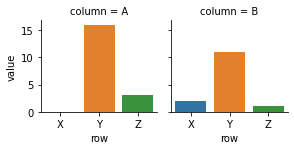

In [ ]:
### SeabornÏùò Í∏∞Îä• Ï§ë ÌïúÍ∞ÄÏßÄ ÏòàÏãúÏûÖÎãàÎã§.
import seaborn as sns
sns.catplot(x = 'row', y = 'value', col = 'column', kind = 'bar', data = tidy1, height = 2);